In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# this cell can be modified if your upload location differs

In [22]:
%cd /content/drive/MyDrive/ELEC576_Team4_Final_Project/

/content/drive/MyDrive/ELEC576_Team4_Final_Project


In [23]:
from matplotlib import pyplot as plt
import numpy as np

In [24]:
with open('OurModel/train_metrics.txt', 'r') as f:
    lines = f.readlines()
train_loss = [float(x.split(': ')[1].split('\n')[0]) for x in lines[1::4]]
val_loss = [float(x.split(': ')[1].split('\n')[0]) for x in lines[2::4]]

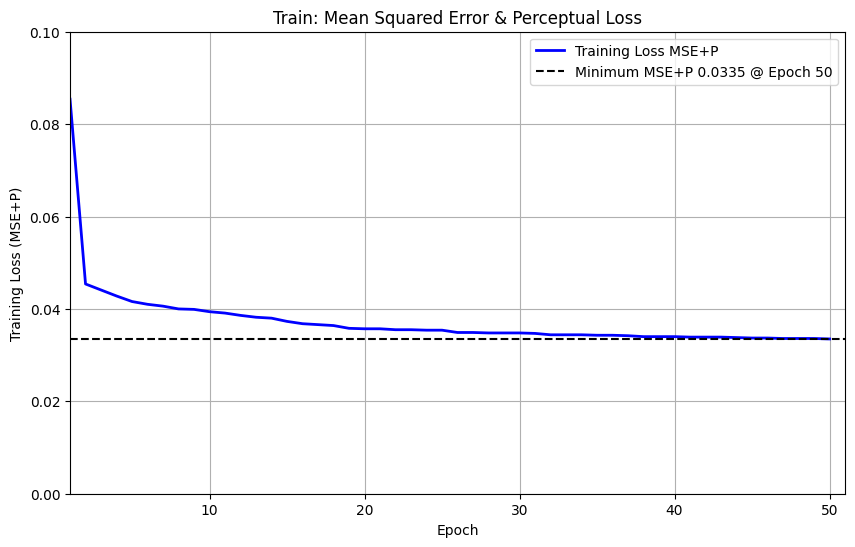

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,51), train_loss, 'b', linewidth=2)
plt.plot([1, 51], [np.min(train_loss)]*2, 'k--')
# plt.plot(range(1,51), val_loss, 'r', linewidth=2)
plt.grid('on')
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE+P)')
plt.ylim(0, 0.1)
plt.xlim(1, 51)
# plt.legend(['Training Loss', 'Validation Loss'])
plt.legend(['Training Loss MSE+P', f'Minimum MSE+P {round(np.min(train_loss), 5)} @ Epoch {np.argmin(train_loss)+1}'])
plt.title('Train: Mean Squared Error & Perceptual Loss')
plt.savefig('train_loss.png')
plt.show()

In [26]:
# irformer
with open('IRFormer/train_16_50.txt', 'r') as f:
    train_info = f.readlines()[2:]
with open('IRFormer/test_16_50.txt', 'r') as f:
    test_info = f.readlines()
mae = np.array([x.split('MAE:')[1].split(',')[0] for x in train_info[::3]]).astype(float)
psnr = np.array([x.split('PSNR:')[1].split(',')[0] for x in train_info[::3]]).astype(float)
ssim = np.array([x.split('SSIM:')[1].split(',')[0] for x in train_info[::3]]).astype(float)

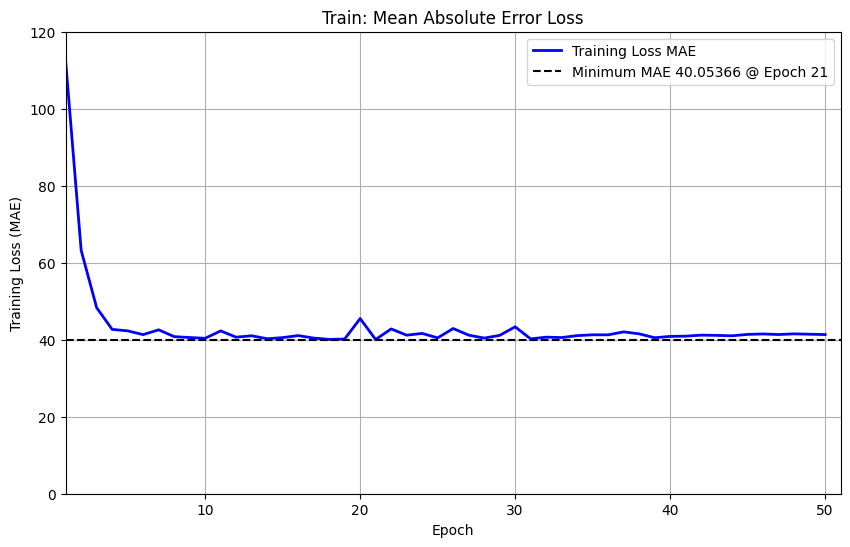

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,51), mae, 'b', linewidth=2)
plt.plot([1, 51], [np.min(mae)]*2, 'k--')
plt.grid('on')
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MAE)')
plt.ylim(0, 120)
plt.xlim(1, 51)
plt.legend(['Training Loss MAE', f'Minimum MAE {round(np.min(mae), 5)} @ Epoch {np.argmin(mae)+1}'])
plt.title('Train: Mean Absolute Error Loss')
plt.savefig('train_mae.png')
plt.show()

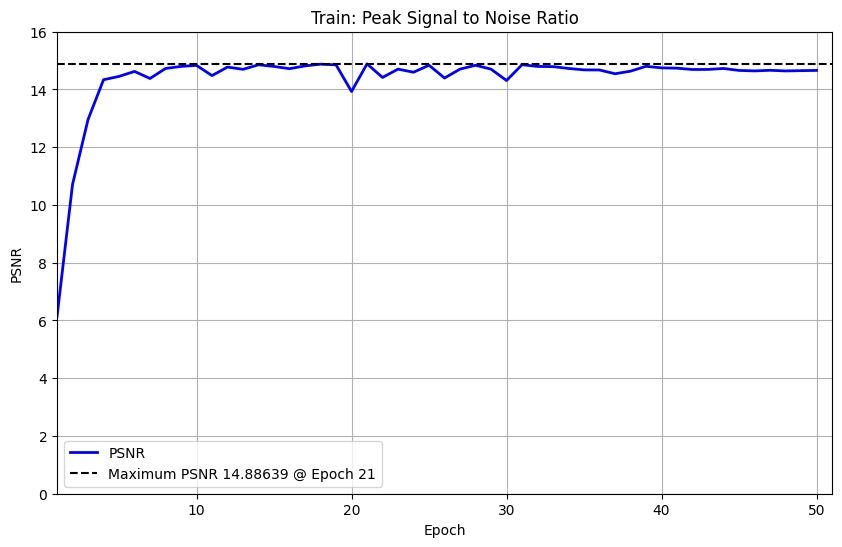

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,51), psnr, 'b', linewidth=2)
plt.plot([1, 51], [np.max(psnr)]*2, 'k--')
plt.grid('on')
plt.xlabel('Epoch')
plt.ylabel('PSNR')
plt.ylim(0, 16)
plt.xlim(1, 51)
plt.legend(['PSNR', f'Maximum PSNR {round(np.max(psnr), 5)} @ Epoch {np.argmax(psnr)+1}'])
plt.title('Train: Peak Signal to Noise Ratio')
plt.savefig('train_psnr.png')
plt.show()

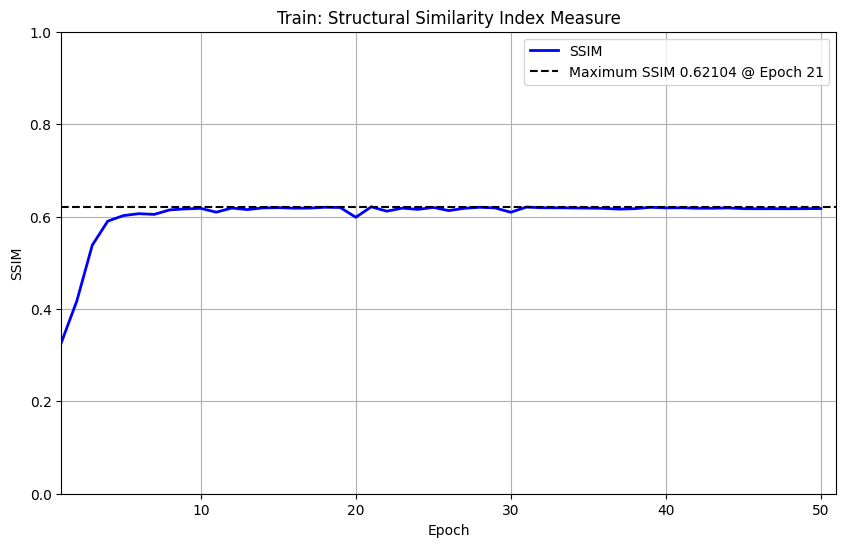

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,51), ssim, 'b', linewidth=2)
plt.plot([1, 51], [np.max(ssim)]*2, 'k--')
plt.grid('on')
plt.xlabel('Epoch')
plt.ylabel('SSIM')
plt.ylim(0, 1)
plt.xlim(1, 51)
plt.legend(['SSIM', f'Maximum SSIM {round(np.max(ssim), 5)} @ Epoch {np.argmax(ssim)+1}'])
plt.title('Train: Structural Similarity Index Measure')
plt.savefig('train_ssim.png')
plt.show()